# Thresholding group level results and Visualization

*Yiyu Wang 2024 Feb*


In [1]:
import os

import glob
import nibabel as nib
import numpy as np
import pandas as pd
import copy

import nilearn
from nilearn.image import smooth_img, resample_to_img,new_img_like, math_img, concat_imgs, get_data
from nilearn import image
from nilearn import plotting
from nilearn.masking import apply_mask
from nilearn.input_data import NiftiMasker
from nilearn.glm.second_level import SecondLevelModel
from nilearn.reporting import get_clusters_table
from nilearn.glm import threshold_stats_img
from scipy.stats import norm

from nilearn.datasets import load_mni152_gm_mask,load_mni152_wm_mask,fetch_surf_fsaverage


import gzip
import math

import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
import warnings


# Set the warning filter to "ignore"
warnings.filterwarnings("ignore")


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/__init__.py:67: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
# load image:

#which_model = 'OneSampleT_2lvl'
which_model = 'OneSampleT_3lvl'
# which_model = 'PairedT_2ndlvl'

which_contrast = 'obs_social_pattern' # 
# which_contrast = 'interaction' 
# which_contrast = 'main_PE'
# which_contrast = 'fb_PE_congruent'
# which_contrast = 'pattern_fb_PE_congruent'
# which_contrast = 'social_fb_PE_congruent'


beta_dir = f'Model_RatingOnset_fmri_results/{which_model}'

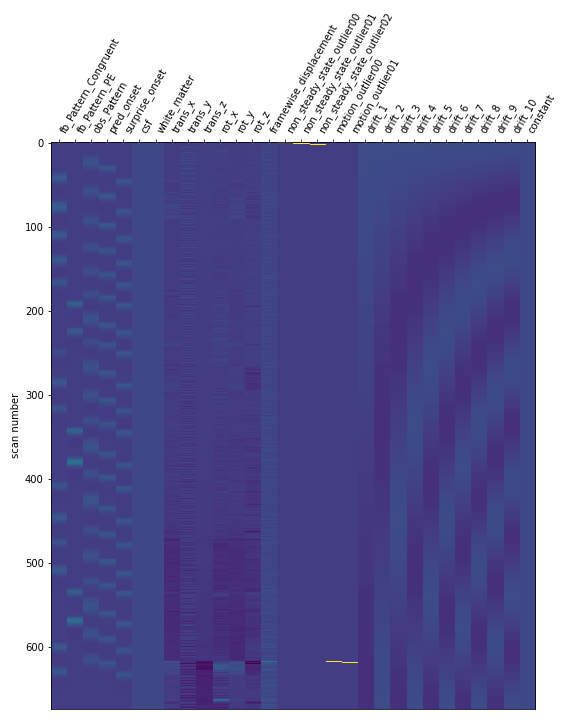

In [3]:
# display first level design:

from IPython.display import Image

# Replace 'path/to/your/image.png' with the actual path to your image file
image_path = f'Model_RatingOnset_fmri_results/1stLvl/143/design_matrix_run1.png'
display(Image(filename=image_path))


In [5]:
# using fwe correction:

fwe = 5.14
# for which_model in ['OneSampleT_2lvl', 'OneSampleT_3lvl', 'PairedT_2ndlvl']:
for which_model in ['OneSampleT_3lvl']:
    beta_dir = f'{which_rating}_fmri_results/{which_model}'
    print(f'\nwhich_model = {which_model}')
    for which_contrast in ['obs_social_pattern', 'interaction', 'main_PE', 'fb_PE_congruent', 'fb_pattern_PE_congruent', 'fb_social_PE_congruent']:
        print(f'which_contrast = {which_contrast}')
        z_map = nib.load(beta_dir + f'/{which_contrast}_z_score.nii.gz')
        # _, fwe = threshold_stats_img(z_map, alpha=0.05, height_control='bonferroni', cluster_threshold=30)
        print(f'fwe = {fwe}')
        max_value = z_map.get_fdata().max()
        min_value = z_map.get_fdata().min()
        print(f'max voxel value = {max_value}')
        print(f'min voxel value = {min_value}')
        if max(fwe, max_value, abs(min_value)) == fwe:
            print("no significant voxels after fwe correction")
        print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')        
    


which_model = OneSampleT_3lvl
which_contrast = obs_social_pattern
fwe = 5.14
max voxel value = 4.52650898472606
min voxel value = -3.604469065976456
no significant voxels after fwe correction
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
which_contrast = interaction
fwe = 5.14
max voxel value = 5.856023052171699
min voxel value = -5.380205895286917
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
which_contrast = main_PE
fwe = 5.14
max voxel value = 5.228516494576518
min voxel value = -7.383024095026982
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
which_contrast = fb_PE_congruent
fwe = 5.14
max voxel value = 3.861743182302484
min voxel value = -3.3848186896067776
no significant voxels after fwe correction
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
which_contrast = fb_pattern_PE_congruent
fwe = 5.14
max voxel value = 11.392377576247197
min voxel value = -12.215727138123507
+++++++++++++++++++++++++++++++++++++++++++++++++

In [6]:

# for which_model in ['OneSampleT_2lvl', 'OneSampleT_3lvl', 'PairedT_2ndlvl']:
for which_model in ['OneSampleT_3lvl']:
    beta_dir = f'{which_rating}_fmri_results/{which_model}'
    print(f'\nwhich_model = {which_model}')
    for which_contrast in ['obs_social_pattern', 'interaction', 'main_PE', 'fb_PE_congruent', 'fb_pattern_PE_congruent', 'fb_social_PE_congruent']:
        print(f'which_contrast = {which_contrast}')
        z_map = nib.load(beta_dir + f'/{which_contrast}_z_score.nii.gz')
        _, fdr = threshold_stats_img(z_map, alpha=0.05, height_control='fdr', cluster_threshold=30)
        print(f'fdr = {fdr}')
        max_value = np.round(z_map.get_fdata().max(),3)
        min_value = np.round(z_map.get_fdata().min(),3)
        print(f'max voxel value = {max_value}')
        print(f'min voxel value = {min_value}')
        if max(fdr, max_value, abs(min_value)) == fdr:
            print("no significant voxels after fdr correction")
        print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')    


which_model = OneSampleT_3lvl
which_contrast = obs_social_pattern
fdr = inf
max voxel value = 4.527
min voxel value = -3.604
no significant voxels after fdr correction
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
which_contrast = interaction
fdr = 3.025904296107167
max voxel value = 5.856
min voxel value = -5.38
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
which_contrast = main_PE
fdr = 2.6138769951269256
max voxel value = 5.229
min voxel value = -7.383
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
which_contrast = fb_PE_congruent
fdr = inf
max voxel value = 3.862
min voxel value = -3.385
no significant voxels after fdr correction
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
which_contrast = fb_pattern_PE_congruent
fdr = 2.0730055615535017
max voxel value = 11.392
min voxel value = -12.216
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
which_contrast = fb_social_PE_congruent
fdr = 2.9765199080918427
max 

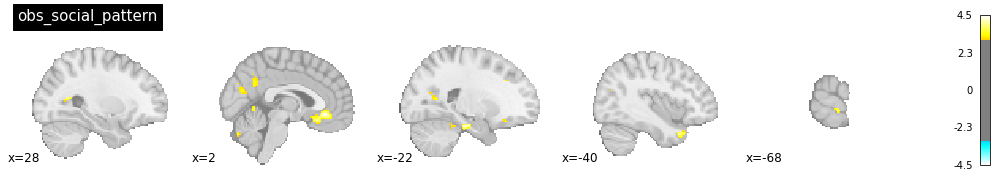

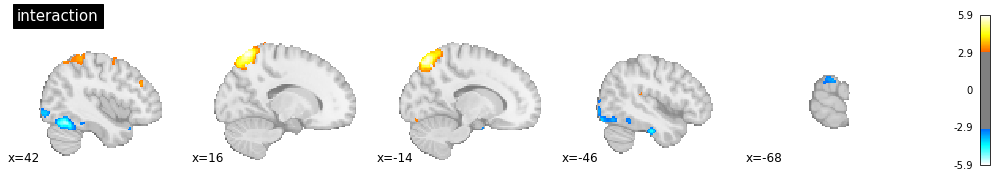

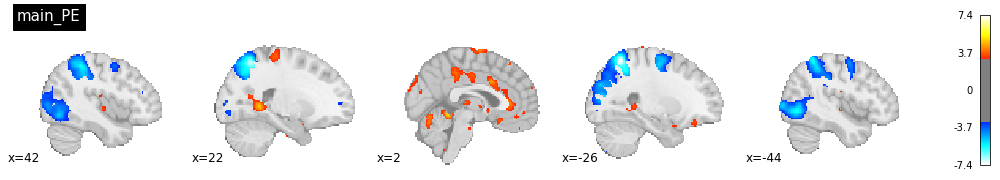

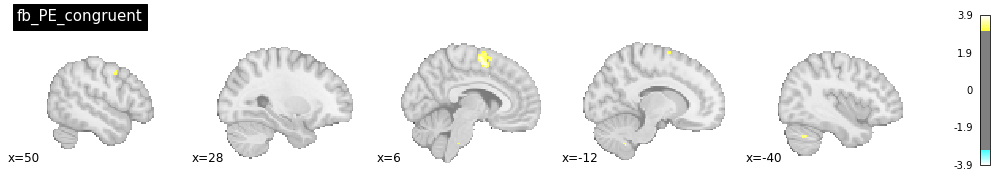

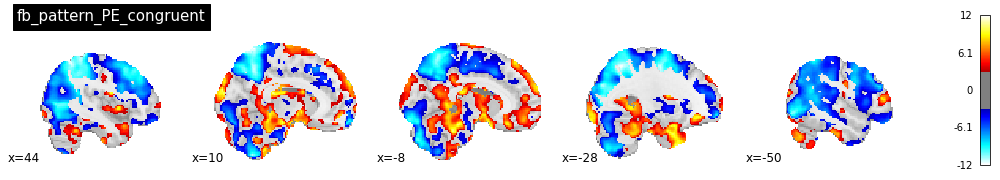

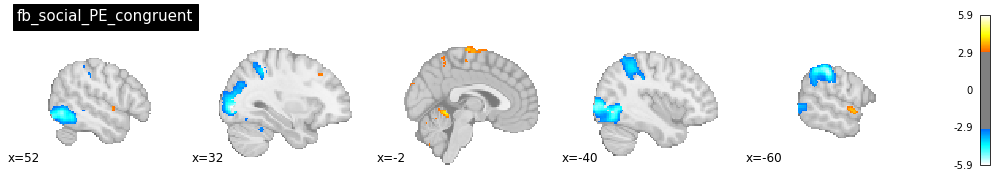

In [7]:
# make interactive plot:
for which_contrast in ['obs_social_pattern', 'interaction', 'main_PE', 'fb_PE_congruent', 'fb_pattern_PE_congruent', 'fb_social_PE_congruent']:
    z_map = nib.load(beta_dir + f'/{which_contrast}_z_score.nii.gz')

    # fwe_corrected, fwe = threshold_stats_img(z_map, alpha=0.05, height_control='bonferroni', cluster_threshold=40)
    # print(f'fwe = {fwe}')
    plotting.plot_stat_map(z_map, threshold=3.1, display_mode='x', cut_coords=5, colorbar=True, title=which_contrast)


In [8]:
# make interactive plot:
for which_contrast in ['obs_social_pattern', 'interaction', 'main_PE', 'fb_PE_congruent', 'fb_pattern_PE_congruent', 'fb_social_PE_congruent']:
    z_map = nib.load(beta_dir + f'/{which_contrast}_z_score.nii.gz')

    # fwe_corrected, fwe = threshold_stats_img(z_map, alpha=0.05, height_control='bonferroni', cluster_threshold=40)
    # print(f'fwe = {fwe}')
    # plotting.plot_stat_map(z_map, threshold=3.1, display_mode='x', cut_coords=5, colorbar=True, title=which_contrast)

    view = plotting.view_img(z_map, threshold=3.1, colorbar=True, title=which_contrast)
    view.save_as_html(f'{beta_dir}/{which_contrast}_z_score.html')


In [4]:
fwe = 5.14
for which_model in ['OneSampleT_2lvl', 'OneSampleT_3lvl', 'PairedT_2ndlvl']:
# for which_model in ['PairedT_2ndlvl']:
    beta_dir = f'model_norating_fmri_results/{which_model}'
    print(f'\nwhich_model = {which_model}')
    for which_contrast in ['obs_social_pattern', 'interaction', 'main_PE', 'fb_PE_congruent', 'fb_pattern_PE_congruent', 'fb_social_PE_congruent']:
        print(f'which_contrast = {which_contrast}')
        z_map = nib.load(beta_dir + f'/{which_contrast}_z_score.nii.gz')
        # _, fwe = threshold_stats_img(z_map, alpha=0.05, height_control='bonferroni', cluster_threshold=30)
        print(f'fwe = {fwe}')
        print(f'max voxel value = {z_map.get_fdata().max()}')
        print(f'min voxel value = {z_map.get_fdata().min()}')
    


which_model = OneSampleT_2lvl
which_contrast = obs_social_pattern
fwe = 5.14
max voxel value = 3.4861167333233634
min voxel value = -2.7580203050964363
which_contrast = interaction
fwe = 5.14
max voxel value = 5.130981536641678
min voxel value = -3.6776383642358046
which_contrast = main_PE
fwe = 5.14
max voxel value = 3.6388746062336828
min voxel value = -5.759971375751789
which_contrast = fb_PE_congruent
fwe = 5.14
max voxel value = 3.6281264590150757
min voxel value = -5.37910504497078
which_contrast = fb_pattern_PE_congruent
fwe = 5.14
max voxel value = 3.864277529149974
min voxel value = -6.7079637958660046
which_contrast = fb_social_PE_congruent
fwe = 5.14
max voxel value = 2.7842026212997095
min voxel value = -3.400005838197903

which_model = OneSampleT_3lvl
which_contrast = obs_social_pattern
fwe = 5.14
max voxel value = 4.730902651176177
min voxel value = -3.419279368772976
which_contrast = interaction
fwe = 5.14
max voxel value = 6.092518757011305
min voxel value = -5.9509785

In [5]:
fwe = 5.149
print(f'fwe = {fwe}')   
for which_model in ['OneSampleT_2lvl', 'OneSampleT_3lvl', 'PairedT_2ndlvl']:
# for which_model in ['PairedT_2ndlvl']:
    beta_dir = f'model_norating_fmri_results/{which_model}'
    print(f'\nwhich_model = {which_model}')
    for which_contrast in ['obs_social_pattern', 'interaction', 'main_PE', 'fb_PE_congruent', 'fb_pattern_PE_congruent', 'fb_social_PE_congruent']:
        print(f'which_contrast = {which_contrast}')
        z_map = nib.load(beta_dir + f'/{which_contrast}_z_score.nii.gz')
        _, fdr = threshold_stats_img(z_map, alpha=0.05, height_control='fdr', cluster_threshold=30)
        print(f'fdr = {fdr}')
        print(f'max voxel value = {z_map.get_fdata().max()}')
    

fwe = 5.149

which_model = OneSampleT_2lvl
which_contrast = obs_social_pattern


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 3.4861167333233634. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


fdr = inf
max voxel value = 3.4861167333233634
which_contrast = interaction
fdr = 3.8985800090265803
max voxel value = 5.130981536641678
which_contrast = main_PE
fdr = 3.903292987736312
max voxel value = 3.6388746062336828
which_contrast = fb_PE_congruent
fdr = 3.989901562848513
max voxel value = 3.6281264590150757
which_contrast = fb_pattern_PE_congruent
fdr = 3.470831174067695
max voxel value = 3.864277529149974
which_contrast = fb_social_PE_congruent


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 3.400005838197903. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


fdr = inf
max voxel value = 2.7842026212997095

which_model = OneSampleT_3lvl
which_contrast = obs_social_pattern


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 4.730902651176177. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


fdr = inf
max voxel value = 4.730902651176177
which_contrast = interaction
fdr = 2.853183955276285
max voxel value = 6.092518757011305
which_contrast = main_PE
fdr = 2.8206535448969383
max voxel value = 4.941261744419585
which_contrast = fb_PE_congruent


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 3.7917926876932437. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


fdr = inf
max voxel value = 3.517386066663037
which_contrast = fb_pattern_PE_congruent
fdr = 2.1538084876847607
max voxel value = 11.908241687996963
which_contrast = fb_social_PE_congruent
fdr = 3.8745797719779387
max voxel value = 4.683319935802479

which_model = PairedT_2ndlvl
which_contrast = obs_social_pattern


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 4.68770489785647. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


fdr = inf
max voxel value = 4.68770489785647
which_contrast = interaction
fdr = 4.429919483620408
max voxel value = 4.298413973073893
which_contrast = main_PE


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 2.9613670093291087. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


fdr = inf
max voxel value = 2.9613670093291087
which_contrast = fb_PE_congruent


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 2.9862747142842863. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


fdr = inf
max voxel value = 2.9862747142842863
which_contrast = fb_pattern_PE_congruent


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 4.034110983738506. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


fdr = inf
max voxel value = 4.034110983738506
which_contrast = fb_social_PE_congruent
fdr = 4.121530012235392
max voxel value = 4.626035198820533


In [4]:
z_map = nib.load(beta_dir + f'/obs_social_pattern_z_score.nii.gz')


z_vals = z_map.get_fdata().flatten()
alpha = 0.05
z_vals_ = -np.sort(-z_vals)
p_vals = norm.sf(z_vals_)
n_samples = len(p_vals)
pos = p_vals < alpha * np.linspace(1 / n_samples, 1, n_samples)
fdr = z_vals_[pos][-1] - 1.0e-12 if pos.any() else np.inf

print(f'fdr = {fdr}')

fdr = inf


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 5.017728254482691. But, you have given threshold=5.149072733780298.
  f"The given float value must not exceed {value_check}. "


fwe = 5.149072733780298
max voxel value = 4.626035198820533


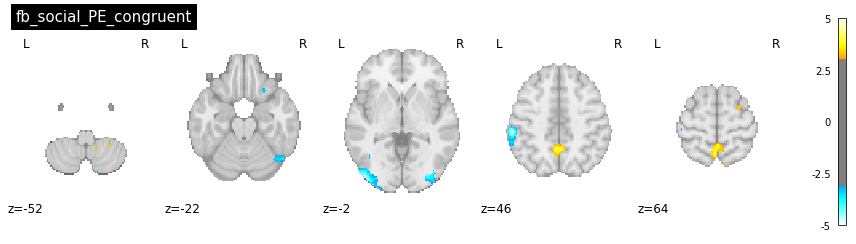

In [6]:
z_map = nib.load(beta_dir + f'/{which_contrast}_z_score.nii.gz')

fwe_corrected, fwe = threshold_stats_img(z_map, alpha=0.05, height_control='bonferroni', cluster_threshold=40)
print(f'fwe = {fwe}')
print(f'max voxel value = {z_map.get_fdata().max()}')
plotting.plot_stat_map(z_map, threshold=3.1, display_mode='z', cut_coords=5, colorbar=True, title=which_contrast)